![machine learnia](logo_machine_learnia.jpg)    
## Machine learnia régression linéaire avec numpy
### lien vers la vidéo de [Régression Linéaire Machine learnia](https://www.youtube.com/watch?v=vG6tDQc86Rs&list=PLO_fdPEVlfKqUF5BPKjGSh7aV9aBshrpY&index=8)

In [45]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

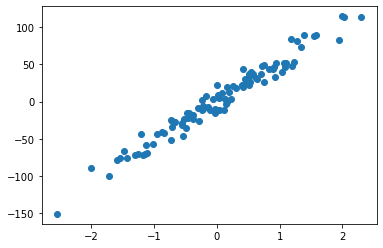

In [46]:
### Création dataset
x,y = make_regression(n_samples= 100, n_features= 1, noise= 10)
### afficher le dataset en nuage de points
plt.scatter(x, y)

### ! lorsqu'on utilise make.regression() les données de "y" sont incomplètes : donc réecrire les dimensions de "y"

In [47]:
# vérifier les dimensions de la matrice 
print(x.shape)
# réecrire les dimensions en prenant le nombre de lignes qu'il y a dans "y" en appelant shape[0]
y = y.reshape(y.shape[0], 1) 
print(y.shape)

(100, 1)
(100, 1)


In [48]:
# matrice x, avec hstack qui permet de coller tous les vecteurs
# on colle les vecteur en rajoutant une colonne de biais "1" de la meme taille que x
X = np.hstack((x, np.ones(x.shape)))
X.shape
print(X) # X = 100 lignes et 2 colonnes

[[-0.27584696  1.        ]
 [ 0.00904205  1.        ]
 [ 1.38547452  1.        ]
 [ 0.83348482  1.        ]
 [ 0.63472132  1.        ]
 [-0.45291072  1.        ]
 [ 0.55154283  1.        ]
 [-1.10920217  1.        ]
 [ 0.91849543  1.        ]
 [-0.37270991  1.        ]
 [ 0.91425548  1.        ]
 [ 0.4018703   1.        ]
 [-0.10417197  1.        ]
 [ 0.15915725  1.        ]
 [ 0.75115387  1.        ]
 [ 0.0350777   1.        ]
 [ 1.58384655  1.        ]
 [-0.70491824  1.        ]
 [ 1.07402068  1.        ]
 [-1.43056564  1.        ]
 [ 1.03343777  1.        ]
 [ 2.29929057  1.        ]
 [-1.54178065  1.        ]
 [ 0.14428696  1.        ]
 [-0.37522224  1.        ]
 [-0.16407845  1.        ]
 [ 0.04171266  1.        ]
 [ 0.18788017  1.        ]
 [ 1.17971151  1.        ]
 [-1.01087122  1.        ]
 [-0.22764046  1.        ]
 [-0.73576846  1.        ]
 [-1.14831409  1.        ]
 [ 1.54546775  1.        ]
 [ 0.01297138  1.        ]
 [ 1.09991088  1.        ]
 [ 0.62585327  1.        ]
 

In [49]:
# Générer theta avec des valeurs aléatoires
theta = np.random.randn(2, 1)
theta.shape # on verifie les dimensions

(2, 1)

## Modèle linéaire

In [50]:
def model(X, theta):
    return X.dot(theta) # retourne le produit matriciel de X theta

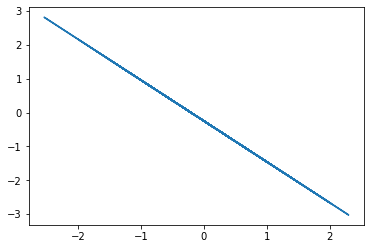

In [51]:
# afficher avec matplotlib le resultat du modèle par rapport au dataset X
plt.plot(x, model(X, theta))

## Fonction coût

In [52]:
def cost_fonction(X, y, theta):
    m = len(y)        # m représente le nombre d'exemple que l'on à dans le dataset, m = à la longueur du vecteur y
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) 
    # ² = à la différence entre notre model et notre y

## Gradients et Descente de gradient

In [59]:
# fonction gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [67]:
# fonction descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations) # sert pour la courbe d'apprentissage)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_fonction(X, y, theta) # on enregistre le coût du modèle pour chaque itérations
    return theta, cost_history

## Machine Learning : Entraînement du modèle

In [72]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)
theta_final

array([[52.38615099],
       [ 0.64826112]])

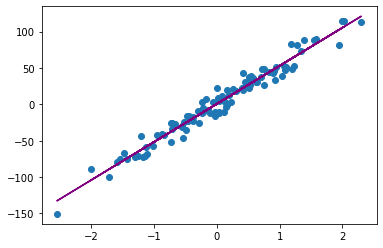

In [73]:
# vérification si le vecteur paramètre donne de bons résultats
predictions = model(X ,theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c="purple")

## Courbe d'apprentissage
###### Voir si la machine apprend correctement

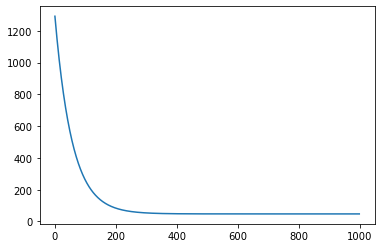

In [71]:
plt.plot(range(1000), cost_history)

## Coefficient de détermination
###### permet d'évaluer la performance de regression linéaire : méthode des moindres carrés
###### donc plus il est proche de 1 plus le modèle est bon

In [74]:
def coef_determination(y, pred):
    u =((y - pred)**2).sum()    # u = residu de la somme des carrées
    v = ((y - y.mean())**2).sum()
    return 1 - u/v       # v = somme total des carrées

In [75]:
coef_determination(y , predictions)

0.9622825031049055